# 4. Multivariate Linear Model

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 4.1 Prepare Data

@Solubility Data

Tetko et al. (2001) and Huuskonen (2000) investigated a set of compounds with corresponding experimental solubility values using complex sets of descriptors. They used linear regression and neural network models to estimate the relationship between chemical structure and solubility. For our analyses, we will use 1267 compounds and a set of more understandable descriptors that fall into one of three groups: 208 binary "fingerprints" that indicate the presence or absence of a particular chemical sub-structure, 16 count descriptors (such as the number of bonds or the number of Bromine atoms) and 4 continuous descriptors (such as molecular weight or surface area).

1267 observation (951+316)

228 mixed variables

www.rdocumentation.org/packages/AppliedPredictiveModeling/versions/1.1-6/topics/solubility

In [3]:
import pandas as pd

data = {}
f_list = ["solTestX", "solTestY", "solTrainX", "solTrainY"]

for i in f_list :
    data[i] = pd.read_csv("./data/"+i+".csv", index_col=0)
    
print("Data Loaded")

Data Loaded


In [4]:
train_data = data["solTrainX"]
train_label = data["solTrainY"]
test_data = data["solTestX"]
test_label = data["solTestY"]

print("train data : ", train_data.shape)
print("train label : ", train_label.shape)
print("test data : ", test_data.shape)
print("test label : ", test_label.shape)

arr = train_data.columns

train data :  (951, 228)
train label :  (951, 1)
test data :  (316, 228)
test label :  (316, 1)


In [5]:
data["solTestX"].head()

,FP001,FP002,FP003,FP004,FP005,FP006,FP007,FP008,FP009,FP010,...,NumCarbon,NumNitrogen,NumOxygen,NumSulfer,NumChlorine,NumHalogen,NumRings,HydrophilicFactor,SurfaceArea1,SurfaceArea2
20,1,0,0,1,0,0,0,0,1,1,...,1.301297,0.000000,1.098612,0.0,0.375,0.375,0.000000,0.416563,8.245324,8.245324
21,1,0,1,1,0,1,0,0,0,0,...,1.719055,0.456826,1.098612,0.0,0.000,0.000,0.000000,0.915006,9.765805,9.765805
23,0,1,0,0,1,0,0,0,0,1,...,2.642633,0.000000,1.098612,0.0,0.000,0.000,0.693147,0.652185,8.591537,8.591537
25,0,0,1,0,0,1,0,0,0,0,...,2.372566,0.584815,0.000000,0.0,0.000,0.000,0.693147,0.734273,6.568437,6.568437
28,1,1,0,1,1,1,0,1,0,0,...,2.642633,0.584815,0.693147,0.0,0.000,0.000,0.693147,0.650346,10.095894,10.095894


In [9]:
#판다스 -> 넘파이 -> 텐서
x, y = torch.from_numpy(train_data.values).float(), torch.from_numpy(train_label.values).float()
x, y

(tensor([[ 0.0000,  1.0000,  0.0000,  ..., -1.6065,  6.8125,  6.8125],
         [ 0.0000,  1.0000,  0.0000,  ..., -0.4413,  9.7538, 12.0296],
         [ 1.0000,  1.0000,  1.0000,  ..., -0.3849,  8.2453,  8.2453],
         ...,
         [ 1.0000,  0.0000,  1.0000,  ..., -1.4838,  5.4565,  5.4565],
         [ 0.0000,  0.0000,  0.0000,  ..., -0.5332,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  1.0000,  ..., -1.3834,  3.8371,  3.8371]]),
 tensor([[ -3.9700],
         [ -3.9800],
         [ -3.9900],
         [ -4.0000],
         [ -4.0600],
         [ -4.0800],
         [ -4.0800],
         [ -4.1000],
         [ -4.1000],
         [ -4.1100],
         [ -4.1100],
         [ -4.1200],
         [ -4.1400],
         [ -4.1400],
         [ -4.1500],
         [ -4.1600],
         [ -4.1600],
         [ -4.1600],
         [ -4.1600],
         [ -4.1700],
         [ -4.1800],
         [ -4.1900],
         [ -4.1900],
         [ -4.1900],
         [ -4.2000],
         [ -4.2100],
         [ -

## 4.2 Define Model

In [10]:
model = nn.Linear(228, 1, bias=True)
print(model)

Linear(in_features=228, out_features=1, bias=True)


In [11]:
loss = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-5)

## 4.3 Train Model

In [12]:
for step in range(50000) :
    pre = model(x)
    cost = loss(pre, y)
    
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    if step % 5000 == 0 :
        print("Step : ",step, ", Cost : ", cost.item())

Step :  0 , Cost :  11.129501342773438
Step :  5000 , Cost :  1.7317215204238892
Step :  10000 , Cost :  1.5015684366226196
Step :  15000 , Cost :  1.3744715452194214
Step :  20000 , Cost :  1.2702786922454834
Step :  25000 , Cost :  1.182850956916809
Step :  30000 , Cost :  1.1088896989822388
Step :  35000 , Cost :  1.0458862781524658
Step :  40000 , Cost :  0.9918708205223083
Step :  45000 , Cost :  0.9452751278877258


In [15]:
print(model.parameters())
model.state_dict()

<generator object Module.parameters at 0x11f518b10>


OrderedDict([('weight',
              tensor([[-0.0584, -0.0027,  0.0070,  0.0302,  0.0261,  0.0251,  0.0533,  0.0268,
                       -0.0952,  0.0185, -0.0263, -0.0106, -0.0346, -0.0708,  0.0232, -0.0162,
                       -0.0287, -0.0112,  0.0159, -0.0126, -0.0795, -0.0099,  0.0414, -0.0173,
                        0.0062, -0.0145, -0.0564, -0.0163,  0.0534, -0.0433, -0.0229,  0.0185,
                        0.0205, -0.0752, -0.0111, -0.0158,  0.0244, -0.0322, -0.0819,  0.0653,
                       -0.0115,  0.0231,  0.0753, -0.0366, -0.0125,  0.0089,  0.0099, -0.0104,
                       -0.0016, -0.0471,  0.0309,  0.0705, -0.0312, -0.0368,  0.0008,  0.0391,
                        0.0696,  0.0476, -0.0889,  0.0105, -0.0300, -0.0693,  0.0733, -0.0527,
                       -0.1352,  0.0028, -0.0307, -0.0249,  0.0027, -0.2082, -0.1112,  0.1025,
                        0.0394,  0.0281, -0.0009, -0.1875, -0.0180,  0.0326,  0.0007,  0.0709,
                       -0.

## 4.4 Test Model

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
x_test = torch.from_numpy(test_data.as_matrix()).float()
y_test = torch.from_numpy(test_label.as_matrix()).float()

/Users/hoyounson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/Users/hoyounson/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [18]:
y_predict = model(x_test)

In [19]:
from sklearn import metrics
print("R2 Score = ", metrics.r2_score(y_test.data, y_predict.data))

R2 Score =  0.788015852359741


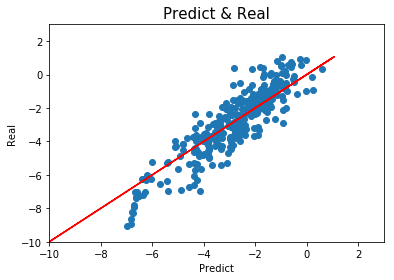

In [20]:
plt.scatter(y_predict.data.numpy(), y_test.data.numpy())

plt.title('Predict & Real', fontdict={'size':15})
plt.xlabel('Predict')
plt.ylabel('Real')

plt.xlim(-10, 3) 
plt.ylim(-10, 3)

plt.plot(y_test.data.numpy(), y_test.data.numpy(), 'r-') 
plt.show()